<a href="https://colab.research.google.com/github/dileepchandhra/Solar-dryer/blob/main/Muskmelon_NC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/Train.csv')
test= pd.read_csv('/content/drive/MyDrive/MINI PROJECT/Test.csv')
df=pd.read_csv('/content/drive/MyDrive/MINI PROJECT/NEW-muskmelon.csv')
train.head()
train['Drying Rate'] = train['Drying Rate'].fillna(train['Drying Rate'].mean())

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   15 non-null     int64  
 1   Tatm (℃)               15 non-null     float64
 2   Atm RH(%)              15 non-null     float64
 3   Velocity (m/s)         15 non-null     float64
 4   Tcoll,in               15 non-null     int64  
 5   Tcoll,out              15 non-null     int64  
 6   Coll,in RH (%)         15 non-null     float64
 7   Coll,out RH (%)        15 non-null     float64
 8   Mass                   15 non-null     float64
 9   Mass of Water Lost     15 non-null     float64
 10  Tatal Dry mass         15 non-null     float64
 11  Moisture Content db    15 non-null     float64
 12  Moisture Content db.1  15 non-null     float64
 13  Moisture Rate db       15 non-null     float64
 14  Moisture Rate db.1     15 non-null     float64
 15  Drying R

In [4]:
train.describe()

,Time,Tatm (℃),Atm RH(%),Velocity (m/s),"Tcoll,in","Tcoll,out","Coll,in RH (%)","Coll,out RH (%)",Mass,Mass of Water Lost,Tatal Dry mass,Moisture Content db,Moisture Content db.1,Moisture Rate db,Moisture Rate db.1,Drying Rate
count,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000
mean,9.066667,35.426667,52.160000,1.122000,34.60000,49.933333,50.293333,31.800000,338.433333,48.720000,5.963200e+01,4.675364,0.629908,0.376571,0.680643,0.680363
std,6.627504,4.298582,13.352143,0.431231,3.88771,11.677002,11.756182,14.967011,267.284305,46.728887,2.206445e-14,4.482229,0.313571,0.361015,0.338827,0.643392
min,0.000000,28.000000,37.500000,0.500000,28.00000,33.000000,37.900000,15.400000,69.200000,0.000000,5.963200e+01,0.160451,0.138266,0.012923,0.149402,0.000000
25%,3.500000,32.000000,41.450000,0.830000,31.00000,40.500000,42.750000,19.400000,88.300000,4.500000,5.963200e+01,0.480749,0.316417,0.038721,0.341902,0.149249
50%,9.000000,36.800000,48.700000,1.070000,37.00000,49.000000,47.000000,30.800000,213.000000,45.900000,5.963200e+01,2.571908,0.720038,0.207151,0.778032,0.509793
75%,15.500000,38.500000,61.150000,1.295000,37.50000,60.000000,55.050000,44.000000,541.600000,92.750000,5.963200e+01,8.082372,0.888444,0.650984,0.960003,0.967601
max,19.000000,41.400000,77.200000,1.980000,39.00000,65.000000,77.000000,65.500000,800.000000,123.600000,5.963200e+01,12.415616,0.925460,1.000000,1.000000,2.072713


In [5]:
train.head()

,Time,Tatm (℃),Atm RH(%),Velocity (m/s),"Tcoll,in","Tcoll,out","Coll,in RH (%)","Coll,out RH (%)",Mass,Mass of Water Lost,Tatal Dry mass,Moisture Content db,Moisture Content db.1,Moisture Rate db,Moisture Rate db.1,Drying Rate
0,0,28.8,73.0,1.07,28,33,65.0,50.0,800.0,0.0,59.632,12.415616,0.925460,1.000000,1.000000,0.680363
1,1,30.0,70.4,1.98,30,41,60.0,44.0,749.8,50.2,59.632,11.573786,0.920469,0.932196,0.994608,0.841830
2,2,32.8,58.0,0.82,32,49,50.0,35.0,703.9,45.9,59.632,10.804065,0.915283,0.870200,0.989004,0.769721
3,3,35.0,52.3,0.98,35,59,47.0,21.0,603.4,100.5,59.632,9.118728,0.901173,0.734456,0.973757,1.685337
4,4,37.0,43.5,1.13,37,65,41.5,19.3,479.8,123.6,59.632,7.046016,0.875715,0.567512,0.946248,2.072713


In [6]:
X_train = train[['Time' ,'Velocity (m/s)',	'Tcoll,out','Coll,out RH (%)']]
y_train = train[  'Moisture Content db']
z_train = train['Moisture Rate db']
X_test = test[['Time' ,'Velocity (m/s)',	'Tcoll,out','Coll,out RH (%)']]
y_test = test[  'Moisture Content db']
z_test= test['Moisture Rate db']

In [7]:
#Linear Regression
from sklearn import linear_model
clf = linear_model.LinearRegression()
lrf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
lrf.fit(X_train,z_train)
y_pred=clf.predict(X_test)
z_pred=lrf.predict(X_test)
clf.score(X_test, y_test)
lr_MSE=mean_squared_error(y_test, y_pred),
lr_MAE= mean_absolute_error(y_test, y_pred)
lr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
lr_R2=r2_score(y_test, y_pred)

lr1_MSE=mean_squared_error(z_test, z_pred),
lr1_MAE= mean_absolute_error(z_test, z_pred)
lr1_RMSE = np.sqrt(mean_squared_error(z_test, z_pred))
lr1_R2=r2_score(z_test, z_pred)

results = pd.DataFrame()

tempResults = pd.DataFrame({'Algorithm':['Linear Regression Method'],'R2':[lr_R2] , 'MAE':[lr_MAE], 'MSE':[lr_MSE], 'RMSE':[lr_RMSE] })
results = pd.concat([results, tempResults])
results = results[['Algorithm','R2', 'MAE','MSE','RMSE']]
results


,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,1.176629,"(2.2236708950977504,)",1.491198


In [8]:
results_1 = pd.DataFrame()

tempResults_1 = pd.DataFrame({'Algorithm':['Linear Regression Method'],'R2':[lr1_R2] , 'MAE':[lr1_MAE], 'MSE':[lr1_MSE], 'RMSE':[lr1_RMSE] })
results_1 = pd.concat([results_1, tempResults_1])
results_1 = results_1[['Algorithm','R2', 'MAE','MSE','RMSE']]
results_1
results_1

,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,0.09477,"(0.01442560325037374,)",0.120107


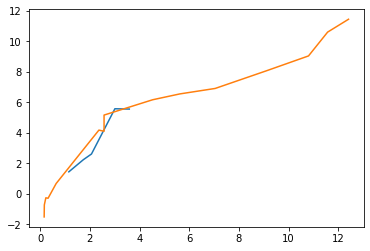

In [9]:
plt.plot(y_test, y_pred)
plt.plot(y_train, clf.predict(X_train))

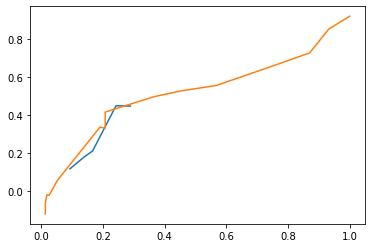

In [10]:
plt.plot(z_test, z_pred)
plt.plot(z_train, lrf.predict(X_train))

In [11]:
#SVM
from sklearn.svm import SVR
model = SVR()
model1= SVR()
from sklearn.model_selection import train_test_split
X_train = train[['Time' ,'Velocity (m/s)',	'Tcoll,out','Coll,out RH (%)']]
y_train = train[  'Moisture Content db']
z_train = train['Moisture Rate db']
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_z = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))
z_train = sc_y.fit_transform(z_train.values.reshape(-1,1))
X_test = sc_X.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test.values.reshape(-1,1))
z_test = sc_y.fit_transform(z_test.values.reshape(-1,1))
model.fit(X_train, y_train)
model1.fit(X_train,z_train)
y_pred = model.predict(X_test)
z_pred = model1.predict(X_test)
#model.score(X_test, y_test)

SVR_MSE=mean_squared_error(y_test, y_pred),
SVR_MAE= mean_absolute_error(y_test, y_pred)
SVR_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
SVR_R2=r2_score(y_test, y_pred)
tempResults = pd.DataFrame({'Algorithm':['Support Vector Regression'] , 'R2':[SVR_R2] , 'MAE':[SVR_MAE], 'MSE':[SVR_MSE], 'RMSE':[SVR_RMSE] })
results = pd.concat([results, tempResults])
results = results[['Algorithm','R2', 'MAE','MSE','RMSE']]
results

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,1.176629,"(2.2236708950977504,)",1.491198
0,Support Vector Regression,0.760337,0.386274,"(0.23966330775916642,)",0.489554


In [12]:
SVR_MSE1=mean_squared_error(z_test, z_pred),
SVR_MAE1= mean_absolute_error(z_test, z_pred)
SVR_RMSE1 = np.sqrt(mean_squared_error(z_test, z_pred))
SVR_R21=r2_score(z_test, z_pred)
tempResults_1 = pd.DataFrame({'Algorithm':['Support Vector Regression'] , 'R2':[SVR_R21] , 'MAE':[SVR_MAE1], 'MSE':[SVR_MSE1], 'RMSE':[SVR_RMSE1] })
results_1 = pd.concat([results_1, tempResults_1])
results_1 = results_1[['Algorithm','R2', 'MAE','MSE','RMSE']]
results_1

,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,0.094770,"(0.01442560325037374,)",0.120107
0,Support Vector Regression,0.759994,0.386655,"(0.24000552529144273,)",0.489904


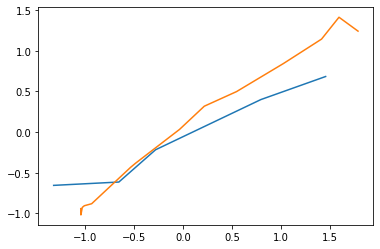

In [13]:
plt.plot(y_test, y_pred)
plt.plot(y_train, model.predict(X_train))

In [14]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,y_train) 
regressor_1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_1.fit(X_train,z_train)
y_pred = regressor.predict(X_test)
z_pred = regressor_1.predict(X_test)

RFR_MSE=mean_squared_error(y_test, y_pred),
RFR_MAE= mean_absolute_error(y_test, y_pred)
RFR_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RFR_R2=r2_score(y_test, y_pred)
tempResults = pd.DataFrame({'Algorithm':['Random Forest Regression'],'R2':[RFR_R2] , 'MAE':[RFR_MAE], 'MSE':[RFR_MSE], 'RMSE':[RFR_RMSE] })
results = pd.concat([results, tempResults])
results = results[['Algorithm','R2', 'MAE','MSE','RMSE']]
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,1.176629,"(2.2236708950977504,)",1.491198
0,Support Vector Regression,0.760337,0.386274,"(0.23966330775916642,)",0.489554
0,Random Forest Regression,0.893071,0.319826,"(0.10692904662352994,)",0.327000


In [15]:
RFR_MSE1=mean_squared_error(z_test, z_pred),
RFR_MAE1= mean_absolute_error(z_test, z_pred)
RFR_RMSE1 = np.sqrt(mean_squared_error(z_test, z_pred))
RFR_R21=r2_score(z_test, z_pred)
tempResults_1 = pd.DataFrame({'Algorithm':['Random Forest Regression'] , 'R2':[RFR_R21] , 'MAE':[RFR_MAE1], 'MSE':[RFR_MSE1], 'RMSE':[RFR_RMSE1] })
results_1 = pd.concat([results_1, tempResults_1])
results_1 = results_1[['Algorithm','R2', 'MAE','MSE','RMSE']]
results_1

,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,0.094770,"(0.01442560325037374,)",0.120107
0,Support Vector Regression,0.759994,0.386655,"(0.24000552529144273,)",0.489904
0,Random Forest Regression,0.890527,0.322973,"(0.1094730480399894,)",0.330867


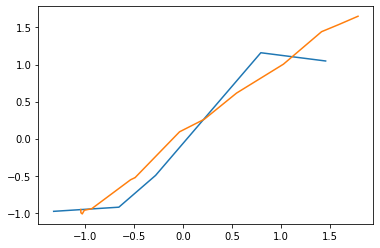

In [16]:
plt.plot(y_test, y_pred)
plt.plot(y_train, regressor.predict(X_train))

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
reg = DecisionTreeRegressor(random_state = 0) 
reg_1 = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
reg.fit(X_train,y_train)
reg_1.fit(X_train,z_train)
y_pred = reg.predict(X_test)
z_pred = reg_1.predict(X_test)

DTR_MSE=mean_squared_error(y_test, y_pred),
DTR_MAE= mean_absolute_error(y_test, y_pred)
DTR_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
DTR_R2=r2_score(y_test, y_pred)
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Regression'],'R2':[RFR_R2] , 'MAE':[RFR_MAE], 'MSE':[RFR_MSE], 'RMSE':[RFR_RMSE] })
results = pd.concat([results, tempResults])
results = results[['Algorithm','R2', 'MAE','MSE','RMSE']]
results

,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,1.176629,"(2.2236708950977504,)",1.491198
0,Support Vector Regression,0.760337,0.386274,"(0.23966330775916642,)",0.489554
0,Random Forest Regression,0.893071,0.319826,"(0.10692904662352994,)",0.327000
0,Decision Tree Regression,0.893071,0.319826,"(0.10692904662352994,)",0.327000


In [18]:
DTR_MSE1=mean_squared_error(z_test, z_pred),
DTR_MAE1= mean_absolute_error(z_test, z_pred)
DTR_RMSE1 = np.sqrt(mean_squared_error(z_test, z_pred))
DTR_R21=r2_score(z_test, z_pred)
tempResults_1 = pd.DataFrame({'Algorithm':['Decision Tree Regression'],'R2':[DTR_R21] , 'MAE':[DTR_MAE1], 'MSE':[DTR_MSE1], 'RMSE':[DTR_RMSE1] })
results_1 = pd.concat([results_1, tempResults_1])
results_1 = results_1[['Algorithm','R2', 'MAE','MSE','RMSE']]
results_1

,Algorithm,R2,MAE,MSE,RMSE
0,Linear Regression Method,-1.889933,0.094770,"(0.01442560325037374,)",0.120107
0,Support Vector Regression,0.759994,0.386655,"(0.24000552529144273,)",0.489904
0,Random Forest Regression,0.890527,0.322973,"(0.1094730480399894,)",0.330867
0,Decision Tree Regression,0.661949,0.506198,"(0.3380508333209035,)",0.581421


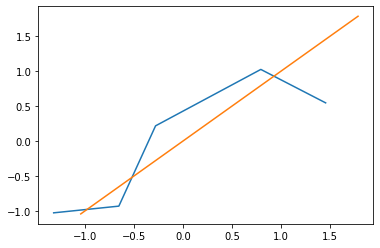

In [19]:
plt.plot(y_test, y_pred)
plt.plot(y_train, reg.predict(X_train))

In [20]:
print(clf.coef_)

[-0.64394626  0.42149624 -0.11146166 -0.0516156 ]


In [21]:
df.head(8)

,Time,Tatm (℃),Atm RH(%),Velocity (m/s),"Tcoll,in","Tcoll,out","Coll,in RH (%)","Coll,out RH (%)",Mass,Mass of Water Lost,Tatal Dry mass,Moisture Content db,Moisture Content db.1,Moisture Rate db,Moisture Rate db.1,Drying Rate
0,0,28.8,73.0,1.07,28,33,65.0,50.0,800.0,0.0,59.632,12.415616,0.925460,1.000000,1.000000,NaN
1,1,30.0,70.4,1.98,30,41,60.0,44.0,749.8,50.2,59.632,11.573786,0.920469,0.932196,0.994608,0.841830
2,2,32.8,58.0,0.82,32,49,50.0,35.0,703.9,45.9,59.632,10.804065,0.915283,0.870200,0.989004,0.769721
3,3,35.0,52.3,0.98,35,59,47.0,21.0,603.4,100.5,59.632,9.118728,0.901173,0.734456,0.973757,1.685337
4,4,37.0,43.5,1.13,37,65,41.5,19.3,479.8,123.6,59.632,7.046016,0.875715,0.567512,0.946248,2.072713
5,5,40.5,38.8,1.20,38,64,38.0,16.5,394.8,85.0,59.632,5.620606,0.848956,0.452705,0.917335,1.425409
6,6,39.0,39.4,1.95,38,65,38.4,15.4,329.6,65.2,59.632,4.527234,0.819078,0.364640,0.885049,1.093373
7,7,42.7,35.2,1.03,39,60,36.8,18.0,273.6,56.0,59.632,3.588141,0.782047,0.289002,0.845036,0.939093


In [22]:
df['Drying Rate'] = df['Drying Rate'].fillna(df['Drying Rate'].mean())

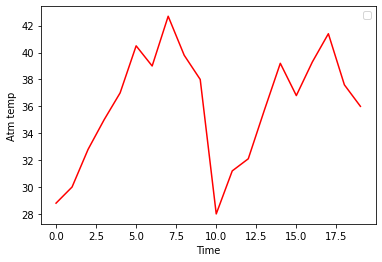

In [23]:
plt.plot(df['Time'],df['Tatm (℃)'],color='Red' )
plt.xlabel("Time")
plt.ylabel("Atm temp")
plt.legend(loc="upper right")

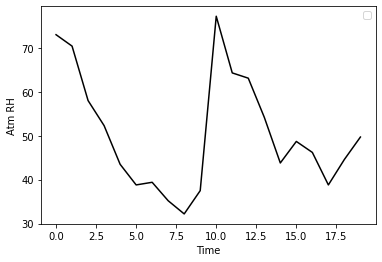

In [24]:
plt.plot(df['Time'],df['Atm RH(%)'],color='Black')
plt.xlabel("Time")
plt.ylabel("Atm RH")
plt.legend(loc="upper right")

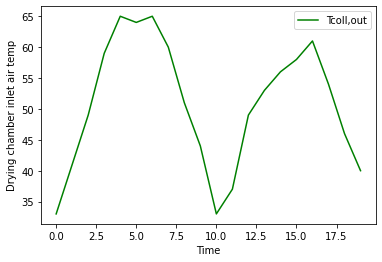

In [25]:
plt.plot(df['Time'],df['Tcoll,out'],color='Green',label='Tcoll,out')
plt.xlabel("Time")
plt.ylabel("Drying chamber inlet air temp")
plt.legend(loc="upper right")

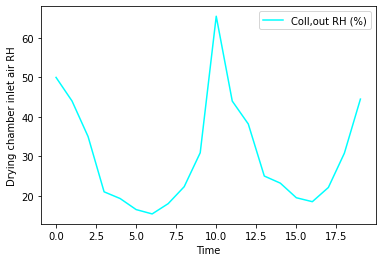

In [26]:
plt.plot(df['Time'],df['Coll,out RH (%)'],color='cyan',label='Coll,out RH (%)')
plt.xlabel("Time")
plt.ylabel("Drying chamber inlet air RH")
plt.legend(loc="upper right")

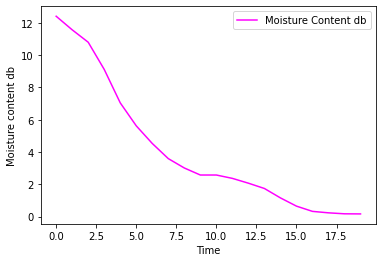

In [27]:
plt.plot(df['Time'],df['Moisture Content db'],color='magenta',label='Moisture Content db')
plt.xlabel("Time")
plt.ylabel("Moisture content db")
plt.legend(loc="upper right")

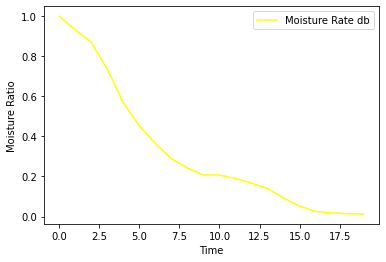

In [28]:
plt.plot(df['Time'],df['Moisture Rate db'],color='yellow',label='Moisture Rate db')
plt.xlabel("Time")
plt.ylabel("Moisture Ratio")
plt.legend(loc="upper right")

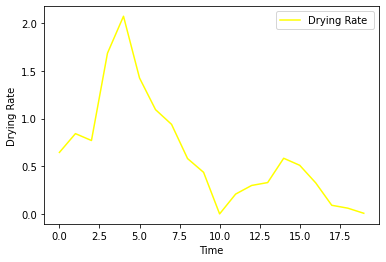

In [29]:
plt.plot(df['Time'],df['Drying Rate'],color='yellow',label='Drying Rate ')
plt.xlabel("Time")
plt.ylabel("Drying Rate")
plt.legend(loc="upper right")